<a href="https://colab.research.google.com/github/cantbelieveimshook/Baseline-Models/blob/main/VGG16_Pre_Trained_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install preprocess

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%load_ext tensorboard
import glob
import os
from os import listdir
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import shuffle
import pickle, datetime
import preprocess as pp
import cv2
from pathlib import Path

from tensorflow import keras
from keras.datasets import cifar10
from tensorflow.keras import models, layers
from tensorflow.keras.models import Model, Sequential
from keras.layers import Input, Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, Convolution2D, MaxPooling2D, MaxPool2D
from keras.layers.convolutional import ZeroPadding2D
from tensorflow.keras.layers import BatchNormalization
from keras.utils import np_utils
from tensorflow.keras import optimizers
from keras.preprocessing import sequence
from keras.preprocessing.image import ImageDataGenerator



import  PIL.Image

In [ ]:
data_path = 'put your dataset path here'
img_path= data_path


os.chdir(img_path) # changes the current working directory to the file path specified. This directory should be the directory of data you plan on using for the model'
print(os.path.abspath(os.getcwd()))

/content/drive/.shortcut-targets-by-id/1tigMWT0fiaXboH1G3YFC0f5RZOEUYf9L/Big Data REU 2022 Team 1/REU 2022 Research/Datasets/new-test-data_Seraj/fft-denoised


In [ ]:
batch_size = 32


# # this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rotation_range = 40,
        width_shift_range = 0.2,
        height_shift_range = 0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        #horizontal_flip=True,
        #fill_mode = "nearest",
        #validation_split = 0.2
        )

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(
        rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        './train',  # this is the target directory
        target_size=(256, 256),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        './validation',
        target_size=(256, 256),
        batch_size=batch_size,
        class_mode='binary')

# this is a similar generator, for validation data
test_generator = test_datagen.flow_from_directory(
        './test',
        target_size=(256, 256),
        batch_size=batch_size,
        class_mode='binary',
        shuffle=False)


Found 710 images belonging to 2 classes.
Found 140 images belonging to 2 classes.
Found 236 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

# import pre-trained model
base_model = VGG16(input_shape = (256, 256, 3), include_top = False, weights = 'imagenet')

for layer in base_model.layers:
    layer.trainable = False

x = layers.Flatten()(base_model.output)

# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(1, activation='sigmoid')(x)

model = Model(base_model.input, x)

model.compile(optimizer = "sgd", loss = 'binary_crossentropy',metrics = ['accuracy'])


58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
 h2 = model.fit(            #use fit instead of fit_generator
        train_generator,
        steps_per_epoch= 120 // batch_size,
        epochs = 100,
        validation_data=validation_generator,
        validation_steps= 64 // batch_size)

Epoch 1/100
3/3 [==============================] - 47s 15s/step - loss: 7.8527 - accuracy: 0.4792 - val_loss: 0.6779 - val_accuracy: 0.5469
Epoch 2/100
3/3 [==============================] - 20s 8s/step - loss: 2.5141 - accuracy: 0.4688 - val_loss: 22.0932 - val_accuracy: 0.5312
Epoch 3/100
3/3 [==============================] - 16s 6s/step - loss: 12.6812 - accuracy: 0.5625 - val_loss: 2.4006 - val_accuracy: 0.5781
Epoch 4/100
3/3 [==============================] - 11s 4s/step - loss: 9.2833 - accuracy: 0.4896 - val_loss: 14.9947 - val_accuracy: 0.4688
Epoch 5/100
3/3 [==============================] - 13s 5s/step - loss: 12.9108 - accuracy: 0.4583 - val_loss: 12.2243 - val_accuracy: 0.4531
Epoch 6/100
3/3 [==============================] - 10s 4s/step - loss: 10.6227 - accuracy: 0.5312 - val_loss: 0.6369 - val_accuracy: 0.6406
Epoch 7/100
3/3 [==============================] - 10s 3s/step - loss: 10.8360 - accuracy: 0.4375 - val_loss: 7.4446 - val_accuracy: 0.5156
Epoch 8/100
3/3 [==

In [ ]:
 k = 100
 
#print("Average validation accuracy: ",sum(h.history['val_accuracy'])/100)

print("Average training accuracy: ",sum(h2.history['accuracy'])/k)
print("Average training loss: ",sum(h2.history['loss'])/k)
print("Average validation accuracy: ",sum(h2.history['val_accuracy'])/k)
print("Average validation loss: ",sum(h2.history['val_loss'])/k)

Average training accuracy:  0.5456041702628136
Average training loss:  7.509059157371521
Average validation accuracy:  0.53515625
Average validation loss:  7.657299087047577


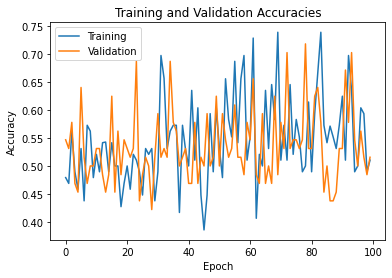

In [ ]:
# plot training and validation accuracies
plt.plot(h2.history['accuracy'])
plt.plot(h2.history['val_accuracy'])
plt.title('Training and Validation Accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc = 'upper left')
plt.show()

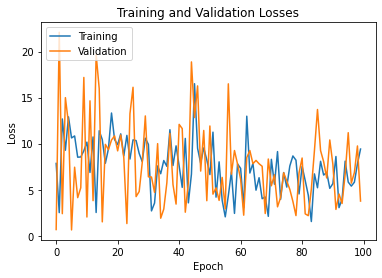

In [ ]:
# plot training and validation losses
plt.plot(h2.history['loss'])
plt.plot(h2.history['val_loss'])
plt.title('Training and Validation Losses')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc = 'upper left')
plt.show()

In [ ]:
import sklearn.metrics as metrics

# get confusion matrix
pred = model.predict(validation_generator)

print("Confusion Matrix: \n")
true_classes = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())
pred = np.round(pred)
confusion_matrix = metrics.confusion_matrix(y_true=true_classes, y_pred=pred)
confusion_matrix


Confusion Matrix: 



array([[12, 58],
       [ 9, 61]])

In [ ]:
# get test accuracy
_, acc = model.evaluate(test_generator)
print(acc)

8/8 [==============================] - 56s 8s/step - loss: 5.0656 - accuracy: 0.5593
0.5593220591545105
